In [39]:
from sklearn import datasets
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV,Ridge
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


In [42]:
california_data = datasets.fetch_california_housing()
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)
data['target'] = pd.Series(california_data.target)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
data.shape

(20640, 9)

We can see that we have 20640 rows and 9 columns

(I):Data preprocessing


Dealing with missing values

In [45]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

We find out that the dataset has no null values

Feature Selection

Feature extraction and dimensionality reduction

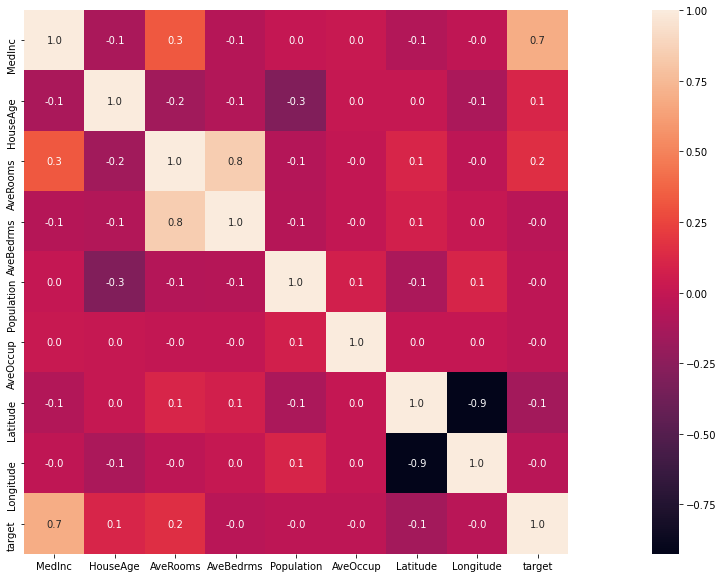

In [46]:
correlation = data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )
#Save the visual
#plt.savefig('HeatMapCorrelation.png', dpi = 100)

From the above correlation plot, we can observe that AveBedrooms and AverageRooms have a highcorrelation of 0.8. This means that the two variables are very correlated to each other that they may affect the prediction of the target during model training. Hence, I will drop averageBedrooms because when compared to the target, it is the least correlated to it. Hence a less important feature compared to averageRooms

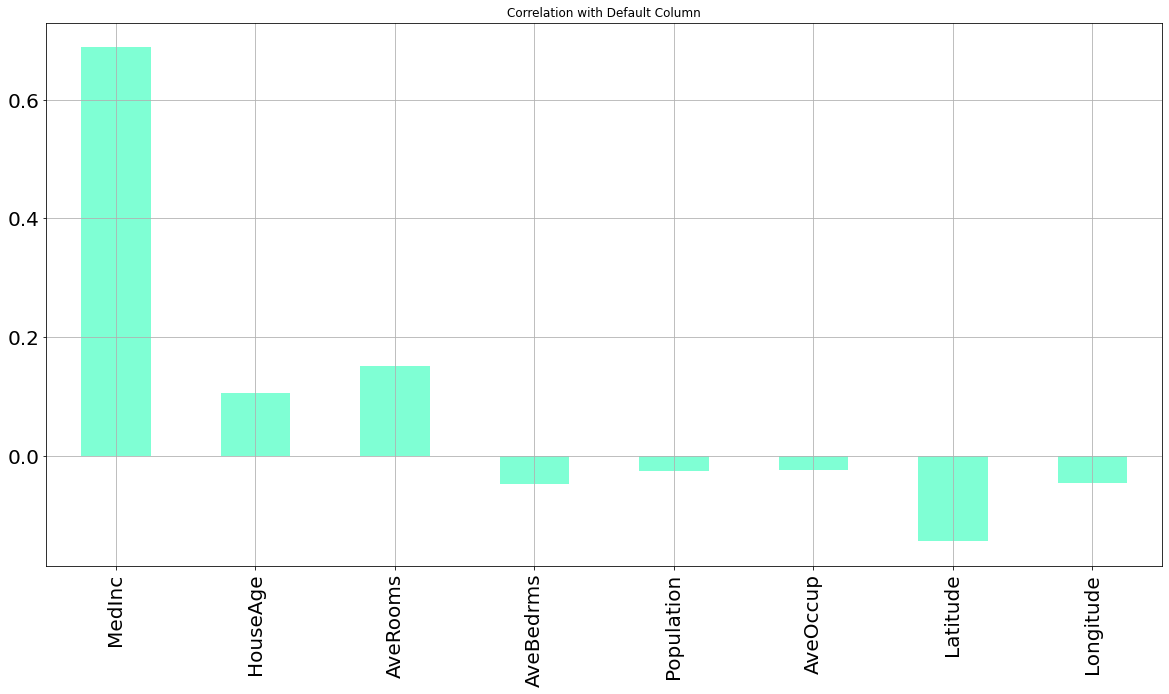

In [47]:
y = data.drop(['target'],axis=1)
y.corrwith(data['target']).plot.bar(figsize = (20, 10), title = "Correlation with Default Column", 
                                        fontsize = 20,rot = 90, grid = True, color='aquamarine')

The above is just a plot of all the features in relation to the target, just to confirm their correlation.
1. We can see that MedIncome is the most correlated with the target, het giving the impression that its a very important feature.

In [48]:
data.drop(['AveBedrms'],axis = 1, inplace = True)
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


Exploring the latitude and longitude feature.

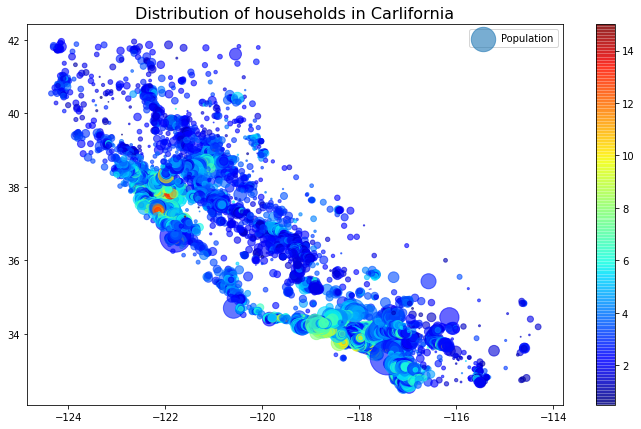

In [49]:
plt.figure(figsize=(12,7))

plt.scatter(x=data['Longitude'],y=data['Latitude'],alpha=0.6,s=data['Population']/30,c=data['MedInc'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households in Carlifornia",size=16)
plt.legend()

Carlifornia is a state along the coast. Hence, on the left side of the plot above is the coastal line of Carlifornia. From the above plot we are able to find out that houses along the coast have a higher median house value, hence house price is affected by location and population density.

In [50]:
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [51]:
target=['target']
target

['target']

In [52]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'target'],
      dtype='object')

In [53]:
pre_data = data.drop(columns=['target'],axis=1)
all_features = list(pre_data.columns)
len(all_features)
#all_features


7

In [54]:
new_data = pd.concat([pre_data,data[target]],axis=1)
new_data
all_features = list(new_data.columns)
all_features
X = new_data.loc[:,all_features[0]:all_features[-2]].values
y = new_data.loc[:,[all_features[-1]]].values
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [55]:
X = PowerTransformer().fit_transform(X)
y = PowerTransformer().fit_transform(y)

We then compute the PCA with a 90% accuracy this gives us 5 features as shown below.

In [56]:
pca_with_varia = PCA(0.9)
pc_s = pca_with_varia.fit_transform(X)
pca_with_varia.n_components_
#Get the 5 features from the 90%
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
target_data = pd.DataFrame(y,columns=['target'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,target
0,2.363147,-1.288347,-1.655268,0.937633,-0.345637,1.715878
1,1.658119,-1.919674,0.565541,-0.905540,-1.467338,1.281389
2,2.322035,-1.228937,-1.542531,1.668567,-0.741540,1.247506
3,2.182669,-0.089342,-1.273990,1.065300,-0.914215,1.188835
4,2.338215,0.298886,-1.399570,0.473772,-0.741092,1.193798
...,...,...,...,...,...,...
20635,1.647060,1.140120,0.602044,-0.487212,1.023021,-1.414289
20636,1.819092,-0.095887,0.131017,0.198912,1.923765,-1.433165
20637,1.656364,0.688147,0.829426,-1.149028,1.058538,-1.160803
20638,1.897572,0.612091,0.312724,-1.337667,1.066061,-1.293200


By looking at the variance ratios we can identify that PC1 has a variance of 29% etc and its the most important feature.

In [57]:
pca_with_varia.explained_variance_ratio_

array([0.29400944, 0.24080826, 0.1750774 , 0.1348876 , 0.09672168])

In [58]:
final_data

,PC1,PC2,PC3,PC4,PC5,target
0,2.363147,-1.288347,-1.655268,0.937633,-0.345637,1.715878
1,1.658119,-1.919674,0.565541,-0.905540,-1.467338,1.281389
2,2.322035,-1.228937,-1.542531,1.668567,-0.741540,1.247506
3,2.182669,-0.089342,-1.273990,1.065300,-0.914215,1.188835
4,2.338215,0.298886,-1.399570,0.473772,-0.741092,1.193798
...,...,...,...,...,...,...
20635,1.647060,1.140120,0.602044,-0.487212,1.023021,-1.414289
20636,1.819092,-0.095887,0.131017,0.198912,1.923765,-1.433165
20637,1.656364,0.688147,0.829426,-1.149028,1.058538,-1.160803
20638,1.897572,0.612091,0.312724,-1.337667,1.066061,-1.293200


From the pair plot below we can see that the data has uniform distribution

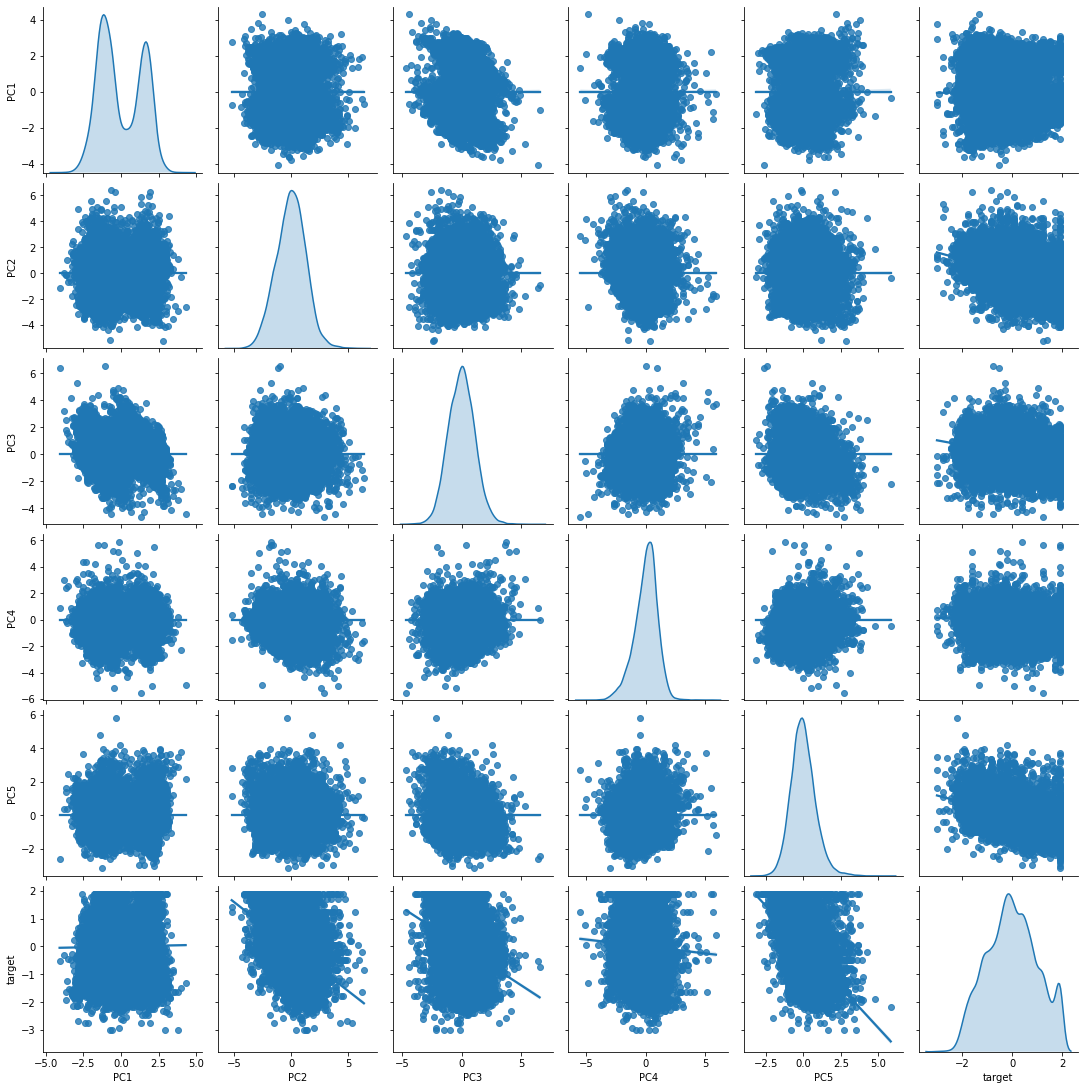

In [59]:
sns.pairplot(final_data,kind='reg', diag_kind='kde')

(II)Data distribution

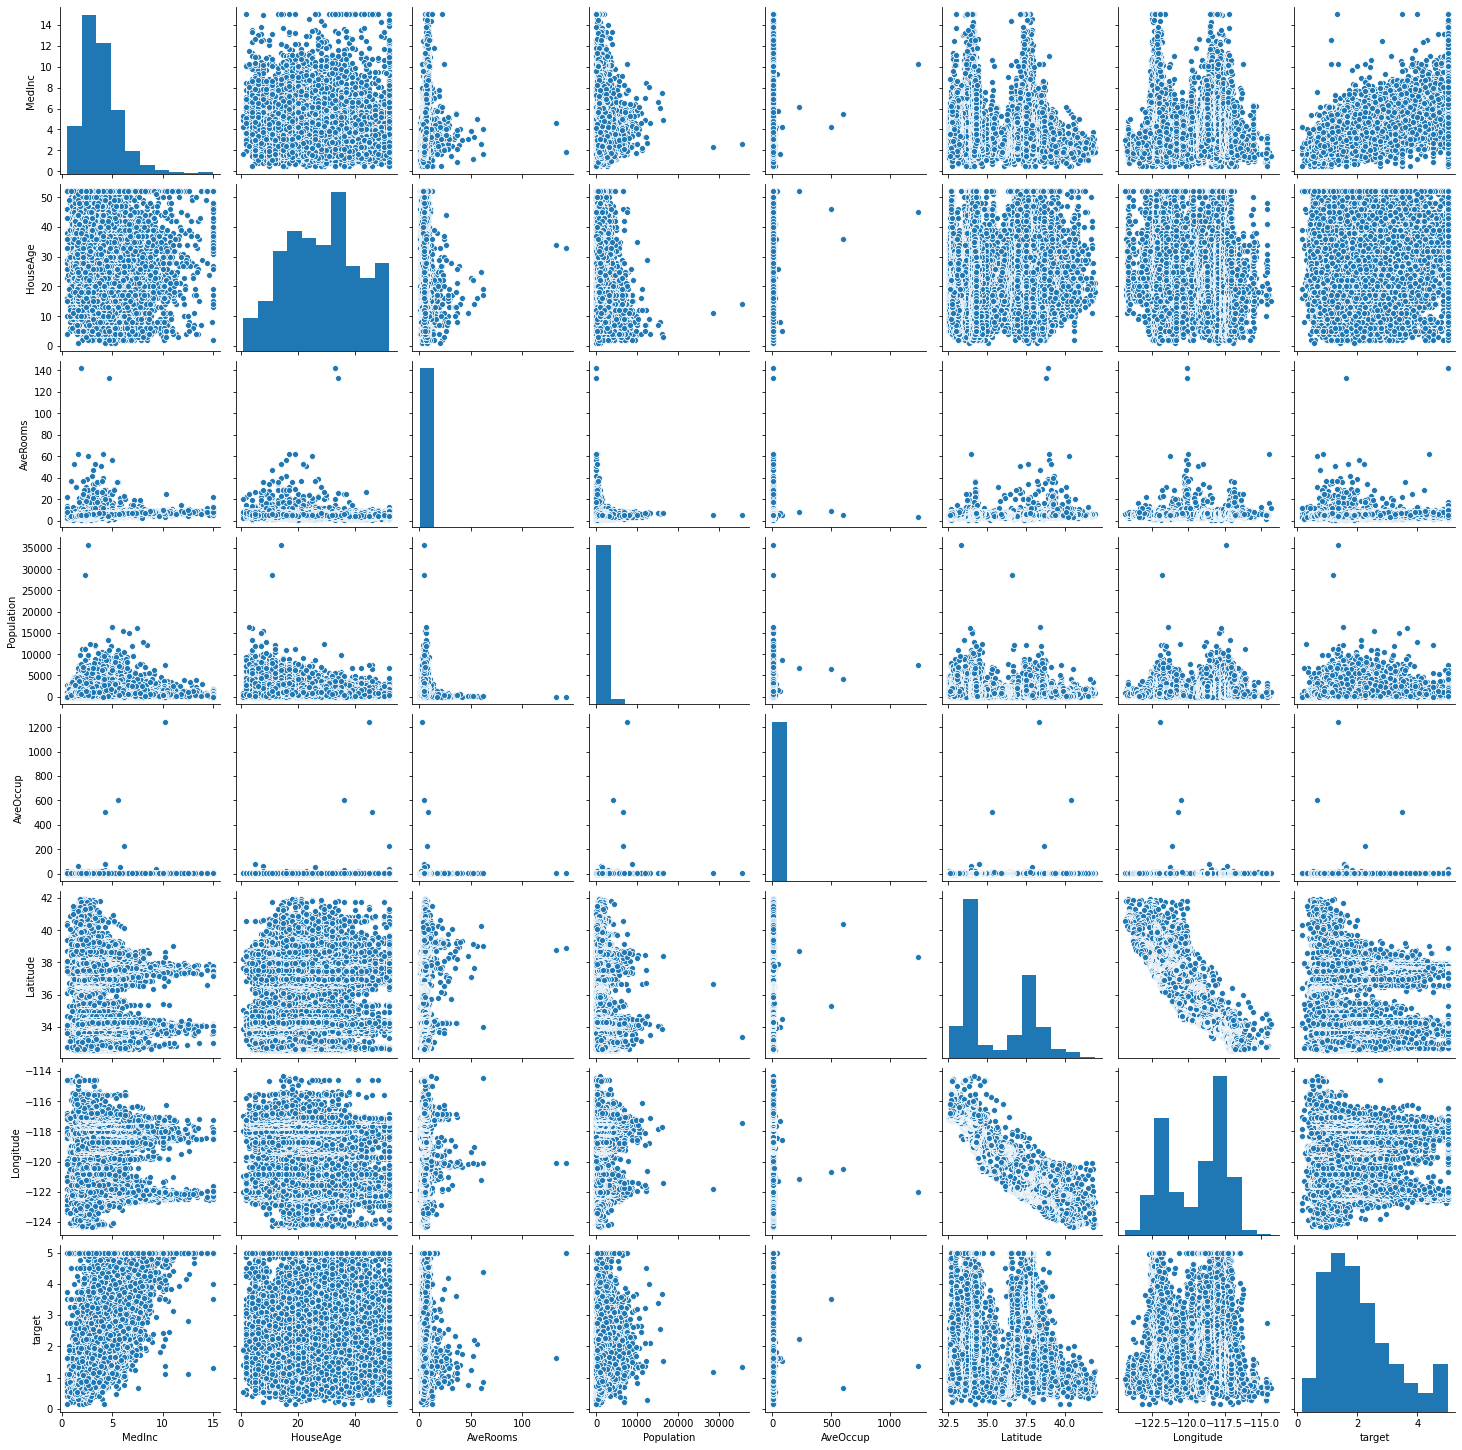

In [ ]:
vis = sns.pairplot(data)

From the plot above, 
1. MedInc variable is the most important interms of predicting the median house price(Target).
2. Latitude and Longitude also influence the target in that the place where a person resides determines the price of the house. From the Scatter plot provided above, we can clearly attest to that since the houses closer to the beach are more expensive.
3. The population has averagely influences the target as its distribution is constant across the plot.
4. The house age has a normal distribution in relation to the target
5. The target has a right tail skew. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f169bb394a8>,
      dtype=object)

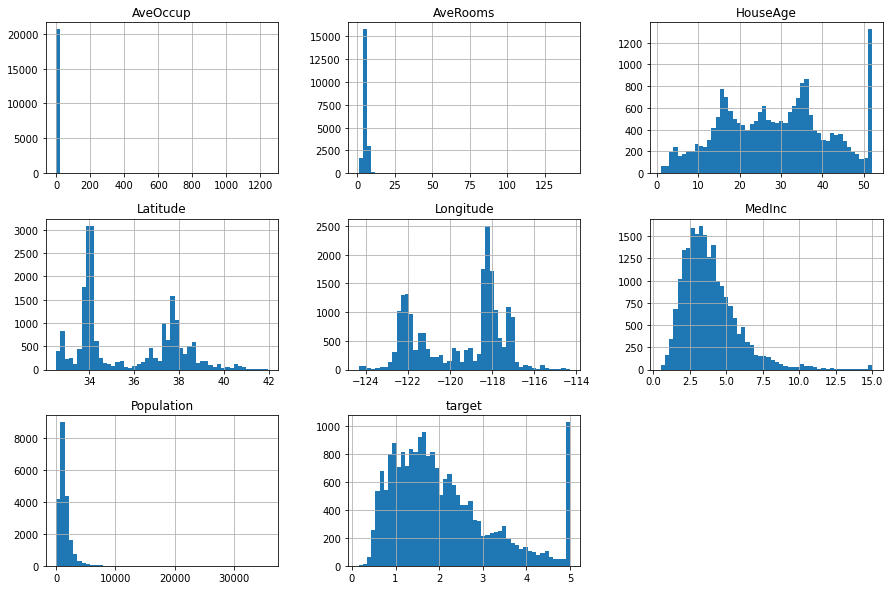

In [ ]:
data.hist(bins=50,figsize=(15,10))


From above histograms it's clear that most of the features are skewed. It seems that housing_median_age and median_housing_value have a peak at the end.

**3 Model training**

In [60]:
trial = final_data.iloc[:,:-1].values
trial

array([[ 2.36314655, -1.28834743, -1.65526842,  0.93763295, -0.34563696],
       [ 1.65811924, -1.91967372,  0.56554118, -0.9055397 , -1.46733839],
       [ 2.32203521, -1.22893728, -1.54253109,  1.66856744, -0.74153961],
       ...,
       [ 1.65636436,  0.68814741,  0.82942624, -1.14902812,  1.058538  ],
       [ 1.89757188,  0.61209132,  0.31272399, -1.33766656,  1.06606131],
       [ 1.45398104,  0.11518386,  1.22340965, -0.75351864,  0.70163786]])

In [61]:
X = final_data.iloc[:,:-1].values
y = final_data.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [62]:
X_train.shape

(16512, 5)

In [63]:
X_test.shape

(4128, 5)

I'll start by training it on a Linear Regression Model





In [66]:
models = linear_model.LinearRegression()
models.fit(X_train,y_train)
accuracy = models.score(X_test,y_test)
accuracy

0.49169147830866844

Kfold splits the data k times into train and validation sets and for each split, the model is trained and tested.
Increasing k reduces the accuracy

In [76]:
kfold = KFold(n_splits=5)

regressor_linear = models
c_validated = cross_val_score(regressor_linear,X_train,y_train,cv=kfold)  
accuracy = c_validated.mean()
accuracy

0.5030904820859068

2. Lasso Model

In [82]:
models = linear_model.Lasso()
models.fit(X_train,y_train)
accuracy = models.score(X_test,y_test)

kfold = KFold(n_splits=5)
regressor_lasso = models
c_validated = cross_val_score(regressor_lasso,X_train,y_train,cv=kfold)  
accuracy = c_validated.mean()
accuracy

-0.000225730089578402

In [83]:
regressor.score(X_test, y_test)

0.01559953434598016

In [84]:
regressor_lasso = models
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
random = RandomizedSearchCV(regressor_lasso,param_distributions=lasso_params,cv=3,n_jobs=-1)
results = random.fit(X_train,y_train)
print(results.best_score_)
print("Best Params are ", results.best_params_)
accuracy = results.score(X_test,y_test)
accuracy

0.5021591031127894
Best Params are  {'tol': 0.001, 'max_iter': 1000, 'alpha': 0.02}


0.4920221331560748

3. Ridge 

In [85]:
models = linear_model.Ridge()
models.fit(X_train,y_train)
accuracy = models.score(X_test,y_test)

kfold = KFold(n_splits=5)
regressor_Ridge = models
c_validated = cross_val_score(regressor_Ridge,X_train,y_train,cv=kfold)  
accuracy = c_validated.mean()
accuracy

0.5034042649457164

In [87]:
regressor_Ridge.score(X_test, y_test)

0.4916930052278712

4. RandomForestRegressor

In [88]:
grid = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = grid.fit( X_test,y_test,)
grid_result
best_params = grid_result.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, X_test,y_test, cv=10, scoring='neg_mean_absolute_error')

rfr.fit(X_train,y_train)
accuracy = rfr.score(X_test,y_test)
accuracy

0.577907480138463